Importing dependencies

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Data collection and Analysis

In [44]:
# load data from CSV to pandas dataframe
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [45]:
# print first 5 rows of dataframe
parkinsons_data.head(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [46]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [47]:
# get more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [48]:
# check for missing values
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [49]:
# get statistical information
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [50]:
# distribution of target variable --> column 'status'
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1 --> Parkinson's positive

0 --> Healthy

In [51]:
# group data based on the target variable
parkinsons_data.groupby('status').mean()

<ipython-input-51-d87297e81dac>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Data Pre-Processing

In [52]:
# separating the features and target

X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

In [53]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [54]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [55]:
# split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [56]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Data Standardization

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit(X_train)

StandardScaler()

In [59]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Model Training: Support Vector Machine

In [60]:
model = svm.SVC(kernel='linear')

In [61]:
# train SVM with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation:


In [62]:
# accuracy score on training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print('Accuracy score of training data: ', training_data_accuracy)

Accuracy score of training data:  0.8846153846153846


In [63]:
# accuracy score on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy score of test data: ', test_data_accuracy)

Accuracy score of test data:  0.8717948717948718


Parkinson's Predictive system

In [64]:
input_data = (236.20000,244.66300,102.13700,0.00277,0.00001,0.00154,0.00153,0.00462,0.02448,0.21700,0.01410,0.01426,0.01621,0.04231,0.00620,24.07800,0.469928,0.628232,-6.816086,0.172270,2.235197,0.119652)

# change input data into numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the numpy array
input_reshaped = input_data_as_np_array.reshape(1,-1)

# standardize the input data
standard_data = scaler.transform(input_reshaped)

prediction = model.predict(standard_data)
print(prediction)

if prediction[0] == 0:
	print('The person is healthy')

else:
	print("The person has Parkinson's disease")

[0]
The person is healthy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Using Esemble Learning Technique : gradient boosting with svm

In [65]:
# Importing dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Data collection and Analysis
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

# Data Pre-Processing
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Data Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning: SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

grid_search_svm = GridSearchCV(SVC(random_state=2), param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, Y_train)

best_params_svm = grid_search_svm.best_params_
print('Best SVM Hyperparameters:', best_params_svm)

svm_model = SVC(**best_params_svm, random_state=2)
svm_model.fit(X_train_scaled, Y_train)

# Hyperparameter Tuning: Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=2), param_grid_gb, cv=5)
grid_search_gb.fit(X_train_scaled, Y_train)

best_params_gb = grid_search_gb.best_params_
print('Best Gradient Boosting Hyperparameters:', best_params_gb)

gb_model = GradientBoostingClassifier(**best_params_gb, random_state=2)
gb_model.fit(X_train_scaled, Y_train)

# Model Evaluation: SVM
svm_train_predictions = svm_model.predict(X_train_scaled)
svm_test_predictions = svm_model.predict(X_test_scaled)

svm_train_accuracy = accuracy_score(Y_train, svm_train_predictions)
svm_test_accuracy = accuracy_score(Y_test, svm_test_predictions)

print('SVM - Accuracy score on training data: ', svm_train_accuracy)
print('SVM - Accuracy score on test data: ', svm_test_accuracy)

# Model Evaluation: Gradient Boosting
gb_train_predictions = gb_model.predict(X_train_scaled)
gb_test_predictions = gb_model.predict(X_test_scaled)

gb_train_accuracy = accuracy_score(Y_train, gb_train_predictions)
gb_test_accuracy = accuracy_score(Y_test, gb_test_predictions)

print('Gradient Boosting - Accuracy score on training data: ', gb_train_accuracy)
print('Gradient Boosting - Accuracy score on test data: ', gb_test_accuracy)

# Ensemble Predictions
ensemble_train_predictions = np.logical_or(svm_train_predictions, gb_train_predictions)
ensemble_test_predictions = np.logical_or(svm_test_predictions, gb_test_predictions)

ensemble_train_accuracy = accuracy_score(Y_train, ensemble_train_predictions)
ensemble_test_accuracy = accuracy_score(Y_test, ensemble_test_predictions)

print('Ensemble - Accuracy score on training data: ', ensemble_train_accuracy)
print('Ensemble - Accuracy score on test data: ', ensemble_test_accuracy)

# Parkinson's Predictive system using Ensemble
input_data = np.array([203.18400,211.52600,196.16000,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.08500,0.00468,0.00610,0.00726,0.01403,0.00065,33.04700,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539])
input_data = input_data.reshape(1, -1)
standard_data = scaler.transform(input_data)

svm_prediction = svm_model.predict(standard_data)
gb_prediction = gb_model.predict(standard_data)
ensemble_prediction = np.logical_or(svm_prediction, gb_prediction)

print("SVM Prediction:", svm_prediction)
print("Gradient Boosting Prediction:", gb_prediction)
print("Ensemble Prediction:", ensemble_prediction)

if ensemble_prediction[0] == 0:
    print('The person is healthy')
else:
    print("The person has Parkinson's disease")


Best SVM Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Gradient Boosting Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
SVM - Accuracy score on training data:  1.0
SVM - Accuracy score on test data:  0.9230769230769231
Gradient Boosting - Accuracy score on training data:  1.0
Gradient Boosting - Accuracy score on test data:  0.7692307692307693
Ensemble - Accuracy score on training data:  1.0
Ensemble - Accuracy score on test data:  0.8974358974358975
SVM Prediction: [0]
Gradient Boosting Prediction: [0]
Ensemble Prediction: [False]
The person is healthy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [66]:
# Importing dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Data collection and Analysis
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

# Data Pre-Processing
# Exclude 'name' feature
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Data Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: SelectKBest with f_classif (ANOVA F-value)
# Choose the top k features based on their F-values
k_best_selector = SelectKBest(f_classif, k='all')
X_train_selected = k_best_selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = k_best_selector.transform(X_test_scaled)

# Hyperparameter Tuning: Grid Search for Decision Tree and AdaBoost
param_grid = {
    'base_estimator__max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 300]
}

decision_tree = DecisionTreeClassifier(random_state=2)
adaboost_grid = GridSearchCV(
    AdaBoostClassifier(base_estimator=decision_tree, random_state=2),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

adaboost_grid.fit(X_train_selected, Y_train)

# Best Hyperparameters
best_params = adaboost_grid.best_params_

# Model Evaluation: AdaBoost with Decision Tree (using best hyperparameters)
adaboost_best = adaboost_grid.best_estimator_
adaboost_train_predictions = adaboost_best.predict(X_train_selected)
adaboost_test_predictions = adaboost_best.predict(X_test_selected)

adaboost_train_accuracy = accuracy_score(Y_train, adaboost_train_predictions)
adaboost_test_accuracy = accuracy_score(Y_test, adaboost_test_predictions)

print('Best Hyperparameters:', best_params)
print('AdaBoost with Decision Tree - Accuracy score on training data: ', adaboost_train_accuracy)
print('AdaBoost with Decision Tree - Accuracy score on test data: ', adaboost_test_accuracy)

# Parkinson's Predictive system using AdaBoost with Decision Tree
input_data = np.array([236.20000, 244.66300, 102.13700, 0.00277, 0.00001, 0.00154, 0.00153, 0.00462, 0.02448, 0.21700, 0.01410, 0.01426, 0.01621, 0.04231, 0.00620, 24.07800, 0.469928, 0.628232, -6.816086, 0.172270, 2.235197, 0.119652])
input_data = input_data.reshape(1, -1)
standard_data = scaler.transform(input_data)
selected_input_data = k_best_selector.transform(standard_data)

adaboost_prediction = adaboost_best.predict(selected_input_data)

print("AdaBoost with Decision Tree Prediction:", adaboost_prediction)

if adaboost_prediction[0] == 0:
    print('The person is healthy')
else:
    print("The person has Parkinson's disease")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Hyperparameters: {'base_estimator__max_depth': 3, 'n_estimators': 300}
AdaBoost with Decision Tree - Accuracy score on training data:  1.0
AdaBoost with Decision Tree - Accuracy score on test data:  0.8717948717948718
AdaBoost with Decision Tree Prediction: [0]
The person is healthy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
# Importing dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Data collection and Analysis
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

# Data Pre-Processing
# Exclude 'name' feature
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Data Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: SelectKBest with f_classif (ANOVA F-value)
# Choose the top k features based on their F-values
k_best_selector = SelectKBest(f_classif, k='all')
X_train_selected = k_best_selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = k_best_selector.transform(X_test_scaled)

# Hyperparameter Tuning: Grid Search for Decision Tree and AdaBoost
param_grid = {
    'base_estimator__max_depth': [3],
    'n_estimators': [300]
}

decision_tree = DecisionTreeClassifier(random_state=2)
adaboost_grid = GridSearchCV(
    AdaBoostClassifier(base_estimator=decision_tree, random_state=2),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

adaboost_grid.fit(X_train_selected, Y_train)

# Best Hyperparameters
best_params = adaboost_grid.best_params_

# Model Training: AdaBoost with Decision Tree (using best hyperparameters)
adaboost_best = adaboost_grid.best_estimator_
adaboost_train_predictions = adaboost_best.predict(X_train_selected)
adaboost_test_predictions = adaboost_best.predict(X_test_selected)

adaboost_train_accuracy = accuracy_score(Y_train, adaboost_train_predictions)
adaboost_test_accuracy = accuracy_score(Y_test, adaboost_test_predictions)

# Model Training: Support Vector Machine
svm_model = SVC(C=10, gamma=0.1, kernel='rbf', probability=True, random_state=2)
svm_model.fit(X_train_selected, Y_train)

# Model Evaluation: Support Vector Machine
svm_train_predictions = svm_model.predict(X_train_selected)
svm_test_predictions = svm_model.predict(X_test_selected)

svm_train_accuracy = accuracy_score(Y_train, svm_train_predictions)
svm_test_accuracy = accuracy_score(Y_test, svm_test_predictions)

# Create a Voting Classifier with AdaBoost and SVM
voting_classifier = VotingClassifier(estimators=[
    ('adaboost', adaboost_best),
    ('svm', svm_model)
], voting='soft')  # Using soft voting for probability-based predictions

# Train the Voting Classifier
voting_classifier.fit(X_train_selected, Y_train)

# Model Evaluation: Voting Classifier
voting_train_predictions = voting_classifier.predict(X_train_selected)
voting_test_predictions = voting_classifier.predict(X_test_selected)

voting_train_accuracy = accuracy_score(Y_train, voting_train_predictions)
voting_test_accuracy = accuracy_score(Y_test, voting_test_predictions)

print('Best Hyperparameters:', best_params)
print('AdaBoost with Decision Tree - Accuracy score on training data: ', adaboost_train_accuracy)
print('AdaBoost with Decision Tree - Accuracy score on test data: ', adaboost_test_accuracy)
print('SVM - Accuracy score on training data: ', svm_train_accuracy)
print('SVM - Accuracy score on test data: ', svm_test_accuracy)
print('Voting Classifier - Accuracy score on training data: ', voting_train_accuracy)
print('Voting Classifier - Accuracy score on test data: ', voting_test_accuracy)

# Parkinson's Predictive system using Voting Classifier
input_data = np.array([236.20000, 244.66300, 102.13700, 0.00277, 0.00001, 0.00154, 0.00153, 0.00462, 0.02448, 0.21700, 0.01410, 0.01426, 0.01621, 0.04231, 0.00620, 24.07800, 0.469928, 0.628232, -6.816086, 0.172270, 2.235197, 0.119652])
input_data = input_data.reshape(1, -1)
standard_data = scaler.transform(input_data)
selected_input_data = k_best_selector.transform(standard_data)

voting_prediction = voting_classifier.predict(selected_input_data)

print("Voting Classifier Prediction:", voting_prediction)

if voting_prediction[0] == 0:
    print('The person is healthy')
else:
    print("The person has Parkinson's disease")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Hyperparameters: {'base_estimator__max_depth': 3, 'n_estimators': 300}
AdaBoost with Decision Tree - Accuracy score on training data:  1.0
AdaBoost with Decision Tree - Accuracy score on test data:  0.8717948717948718
SVM - Accuracy score on training data:  1.0
SVM - Accuracy score on test data:  0.9230769230769231
Voting Classifier - Accuracy score on training data:  1.0
Voting Classifier - Accuracy score on test data:  0.8717948717948718
Voting Classifier Prediction: [0]
The person is healthy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [68]:
# Importing dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Data collection and Analysis
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

# Data Pre-Processing
# Exclude 'name' feature
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Data Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: SelectKBest with f_classif (ANOVA F-value)
# Choose the top k features based on their F-values
k_best_selector = SelectKBest(f_classif, k='all')
X_train_selected = k_best_selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = k_best_selector.transform(X_test_scaled)

# Model Training: Support Vector Machine (SVM)
svm_model = SVC(C=10, gamma=0.1, kernel='rbf', probability=True, random_state=2)
svm_model.fit(X_train_selected, Y_train)

# Model Evaluation: Support Vector Machine
svm_train_predictions = svm_model.predict(X_train_selected)
svm_test_predictions = svm_model.predict(X_test_selected)

svm_train_accuracy = accuracy_score(Y_train, svm_train_predictions)
svm_test_accuracy = accuracy_score(Y_test, svm_test_predictions)

print('SVM - Accuracy score on training data: ', svm_train_accuracy)
print('SVM - Accuracy score on test data: ', svm_test_accuracy)

# Ensemble Approach: Bagging with SVM
bagging_model = BaggingClassifier(base_estimator=svm_model, n_estimators=100, random_state=2)
bagging_model.fit(X_train_selected, Y_train)

# Model Evaluation: Bagging with SVM
bagging_train_predictions = bagging_model.predict(X_train_selected)
bagging_test_predictions = bagging_model.predict(X_test_selected)

bagging_train_accuracy = accuracy_score(Y_train, bagging_train_predictions)
bagging_test_accuracy = accuracy_score(Y_test, bagging_test_predictions)

print('Bagging with SVM - Accuracy score on training data: ', bagging_train_accuracy)
print('Bagging with SVM - Accuracy score on test data: ', bagging_test_accuracy)

# Parkinson's Predictive system using Bagging with SVM
input_data = np.array([236.20000, 244.66300, 102.13700, 0.00277, 0.00001, 0.00154, 0.00153, 0.00462, 0.02448, 0.21700, 0.01410, 0.01426, 0.01621, 0.04231, 0.00620, 24.07800, 0.469928, 0.628232, -6.816086, 0.172270, 2.235197, 0.119652])
input_data = input_data.reshape(1, -1)
standard_data = scaler.transform(input_data)
selected_input_data = k_best_selector.transform(standard_data)

bagging_prediction = bagging_model.predict(selected_input_data)

print("Bagging with SVM Prediction:", bagging_prediction)

if bagging_prediction[0] == 0:
    print('The person is healthy')
else:
    print("The person has Parkinson's disease")


SVM - Accuracy score on training data:  1.0
SVM - Accuracy score on test data:  0.9230769230769231


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging with SVM - Accuracy score on training data:  1.0
Bagging with SVM - Accuracy score on test data:  0.8717948717948718
Bagging with SVM Prediction: [0]
The person is healthy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Data collection and Analysis
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

# Data Pre-Processing
# Exclude 'name' feature
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Data Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: SelectKBest with f_classif (ANOVA F-value)
# Choose the top k features based on their F-values
k_best_selector = SelectKBest(f_classif, k='all')
X_train_selected = k_best_selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = k_best_selector.transform(X_test_scaled)

# Hyperparameter tuning for SVM
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}
svm_model = SVC(probability=True, random_state=2)
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_selected, Y_train)

# Best hyperparameters
best_svm_model = grid_search.best_estimator_

# Model Evaluation: Support Vector Machine
svm_train_predictions = best_svm_model.predict(X_train_selected)
svm_test_predictions = best_svm_model.predict(X_test_selected)

svm_train_accuracy = accuracy_score(Y_train, svm_train_predictions)
svm_test_accuracy = accuracy_score(Y_test, svm_test_predictions)

print('SVM - Accuracy score on training data: ', svm_train_accuracy)
print('SVM - Accuracy score on test data: ', svm_test_accuracy)

# Ensemble Approach: AdaBoost with SVM
adaboost_model = AdaBoostClassifier(base_estimator=best_svm_model, n_estimators=100, random_state=2)
adaboost_model.fit(X_train_selected, Y_train)

# Model Evaluation: AdaBoost with SVM
adaboost_train_predictions = adaboost_model.predict(X_train_selected)
adaboost_test_predictions = adaboost_model.predict(X_test_selected)

adaboost_train_accuracy = accuracy_score(Y_train, adaboost_train_predictions)
adaboost_test_accuracy = accuracy_score(Y_test, adaboost_test_predictions)

print('AdaBoost with SVM - Accuracy score on training data: ', adaboost_train_accuracy)
print('AdaBoost with SVM - Accuracy score on test data: ', adaboost_test_accuracy)

# Parkinson's Predictive system using AdaBoost with SVM
input_data = np.array([236.20000, 244.66300, 102.13700, 0.00277, 0.00001, 0.00154, 0.00153, 0.00462, 0.02448, 0.21700, 0.01410, 0.01426, 0.01621, 0.04231, 0.00620, 24.07800, 0.469928, 0.628232, -6.816086, 0.172270, 2.235197, 0.119652])
input_data = input_data.reshape(1, -1)
standard_data = scaler.transform(input_data)
selected_input_data = k_best_selector.transform(standard_data)

adaboost_prediction = adaboost_model.predict(selected_input_data)

print("AdaBoost with SVM Prediction:", adaboost_prediction)

if adaboost_prediction[0] == 0:
    print('The person is healthy')
else:
    print("The person has Parkinson's disease")


SVM - Accuracy score on training data:  1.0
SVM - Accuracy score on test data:  0.9230769230769231
AdaBoost with SVM - Accuracy score on training data:  1.0
AdaBoost with SVM - Accuracy score on test data:  0.8974358974358975
AdaBoost with SVM Prediction: [0]
The person is healthy


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Data collection and Analysis
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

# Data Pre-Processing
# Exclude 'name' feature
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Data Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: SelectKBest with f_classif (ANOVA F-value)
# Choose the top k features based on their F-values
k_best_selector = SelectKBest(f_classif, k='all')
X_train_selected = k_best_selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = k_best_selector.transform(X_test_scaled)

# Hyperparameter tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}
svm_model = SVC(probability=True, random_state=2)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_selected, Y_train)

# Best hyperparameters for SVM
best_svm_model = grid_search_svm.best_estimator_

# Model Evaluation: Support Vector Machine
svm_train_predictions = best_svm_model.predict(X_train_selected)
svm_test_predictions = best_svm_model.predict(X_test_selected)

svm_train_accuracy = accuracy_score(Y_train, svm_train_predictions)
svm_test_accuracy = accuracy_score(Y_test, svm_test_predictions)

print('SVM - Accuracy score on training data: ', svm_train_accuracy)
print('SVM - Accuracy score on test data: ', svm_test_accuracy)

# Ensemble Approach 1: AdaBoost with SVM
adaboost_model = AdaBoostClassifier(base_estimator=best_svm_model, n_estimators=100, random_state=2)
adaboost_model.fit(X_train_selected, Y_train)

# Model Evaluation: AdaBoost with SVM
adaboost_train_predictions = adaboost_model.predict(X_train_selected)
adaboost_test_predictions = adaboost_model.predict(X_test_selected)

adaboost_train_accuracy = accuracy_score(Y_train, adaboost_train_predictions)
adaboost_test_accuracy = accuracy_score(Y_test, adaboost_test_predictions)

print('AdaBoost with SVM - Accuracy score on training data: ', adaboost_train_accuracy)
print('AdaBoost with SVM - Accuracy score on test data: ', adaboost_test_accuracy)

# Ensemble Approach 2: XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=2)
xgb_model.fit(X_train_selected, Y_train)

# Model Evaluation: XGBoost
xgb_train_predictions = xgb_model.predict(X_train_selected)
xgb_test_predictions = xgb_model.predict(X_test_selected)

xgb_train_accuracy = accuracy_score(Y_train, xgb_train_predictions)
xgb_test_accuracy = accuracy_score(Y_test, xgb_test_predictions)

print('XGBoost - Accuracy score on training data: ', xgb_train_accuracy)
print('XGBoost - Accuracy score on test data: ', xgb_test_accuracy)

# Parkinson's Predictive system using AdaBoost with SVM
input_data = np.array([236.20000, 244.66300, 102.13700, 0.00277, 0.00001, 0.00154, 0.00153, 0.00462, 0.02448, 0.21700, 0.01410, 0.01426, 0.01621, 0.04231, 0.00620, 24.07800, 0.469928, 0.628232, -6.816086, 0.172270, 2.235197, 0.119652])
input_data = input_data.reshape(1, -1)
standard_data = scaler.transform(input_data)
selected_input_data = k_best_selector.transform(standard_data)

adaboost_prediction = adaboost_model.predict(selected_input_data)
xgb_prediction = xgb_model.predict(selected_input_data)

print("AdaBoost with SVM Prediction:", adaboost_prediction)
print("XGBoost Prediction:", xgb_prediction)

if adaboost_prediction[0] == 0:
    print('The person is healthy according to AdaBoost with SVM')
else:
    print("The person has Parkinson's disease according to AdaBoost with SVM")

if xgb_prediction[0] == 0:
    print('The person is healthy according to XGBoost')
else:
    print("The person has Parkinson's disease according to XGBoost")


SVM - Accuracy score on training data:  1.0
SVM - Accuracy score on test data:  0.9230769230769231
AdaBoost with SVM - Accuracy score on training data:  1.0
AdaBoost with SVM - Accuracy score on test data:  0.8974358974358975


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


XGBoost - Accuracy score on training data:  1.0
XGBoost - Accuracy score on test data:  0.8717948717948718
AdaBoost with SVM Prediction: [0]
XGBoost Prediction: [0]
The person is healthy according to AdaBoost with SVM
The person is healthy according to XGBoost


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Data collection and Analysis
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

# Data Pre-Processing
# Exclude 'name' feature
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Data Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: SelectKBest with f_classif (ANOVA F-value)
# Choose the top k features based on their F-values
k_best_selector = SelectKBest(f_classif, k='all')
X_train_selected = k_best_selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = k_best_selector.transform(X_test_scaled)

# Hyperparameter tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}
svm_model = SVC(probability=True, random_state=2)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_selected, Y_train)

# Best hyperparameters for SVM
best_svm_model = grid_search_svm.best_estimator_

# Model Evaluation: Support Vector Machine
svm_train_predictions = best_svm_model.predict(X_train_selected)
svm_test_predictions = best_svm_model.predict(X_test_selected)

svm_train_accuracy = accuracy_score(Y_train, svm_train_predictions)
svm_test_accuracy = accuracy_score(Y_test, svm_test_predictions)

print('SVM - Accuracy score on training data: ', svm_train_accuracy)
print('SVM - Accuracy score on test data: ', svm_test_accuracy)

# Ensemble Approach: AdaBoost with SVM
adaboost_model = AdaBoostClassifier(base_estimator=best_svm_model, n_estimators=100, random_state=2)
adaboost_model.fit(X_train_selected, Y_train)

# Model Evaluation: AdaBoost with SVM
adaboost_train_predictions = adaboost_model.predict(X_train_selected)
adaboost_test_predictions = adaboost_model.predict(X_test_selected)

adaboost_train_accuracy = accuracy_score(Y_train, adaboost_train_predictions)
adaboost_test_accuracy = accuracy_score(Y_test, adaboost_test_predictions)

print('AdaBoost with SVM - Accuracy score on training data: ', adaboost_train_accuracy)
print('AdaBoost with SVM - Accuracy score on test data: ', adaboost_test_accuracy)

# Parkinson's Predictive system using AdaBoost with SVM
input_data = np.array([236.20000, 244.66300, 102.13700, 0.00277, 0.00001, 0.00154, 0.00153, 0.00462, 0.02448, 0.21700, 0.01410, 0.01426, 0.01621, 0.04231, 0.00620, 24.07800, 0.469928, 0.628232, -6.816086, 0.172270, 2.235197, 0.119652])
input_data = input_data.reshape(1, -1)
standard_data = scaler.transform(input_data)
selected_input_data = k_best_selector.transform(standard_data)

adaboost_prediction = adaboost_model.predict(selected_input_data)

print("AdaBoost with SVM Prediction:", adaboost_prediction)

if adaboost_prediction[0] == 0:
    print('The person is healthy according to AdaBoost with SVM')
else:
    print("The person has Parkinson's disease according to AdaBoost with SVM")


SVM - Accuracy score on training data:  1.0
SVM - Accuracy score on test data:  0.9230769230769231
AdaBoost with SVM - Accuracy score on training data:  1.0
AdaBoost with SVM - Accuracy score on test data:  0.8974358974358975
AdaBoost with SVM Prediction: [0]
The person is healthy according to AdaBoost with SVM


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SVM - Accuracy score on training data:  1.0
SVM - Accuracy score on test data:  0.9230769230769231
AdaBoost with SVM - Accuracy score on training data:  1.0
AdaBoost with SVM - Accuracy score on test data:  0.8974358974358975
AdaBoost with SVM - Precision:  0.9354838709677419
AdaBoost with SVM - Recall:  0.9354838709677419
AdaBoost with SVM - F1 Score:  0.9354838709677419


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


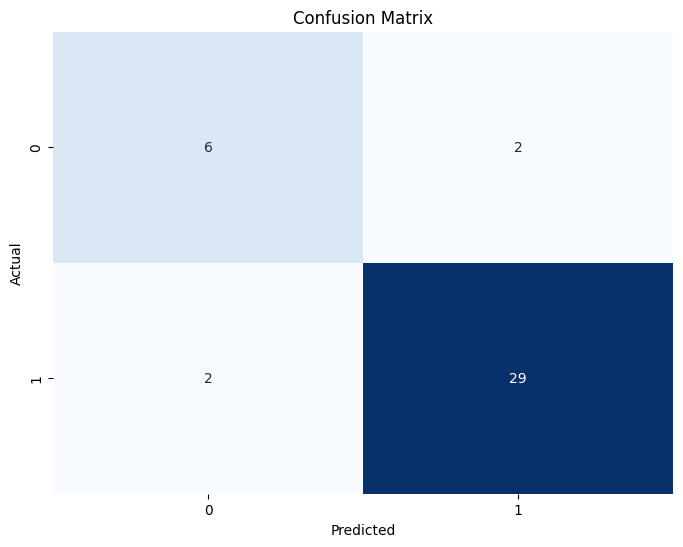

Accuracy score on training data:  1.0
Accuracy score on test data:  0.8974358974358975
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.94      0.94      0.94        31

    accuracy                           0.90        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.90      0.90      0.90        39

Confusion Matrix:
[[ 6  2]
 [ 2 29]]


In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Data collection and Analysis
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

# Data Pre-Processing
# Exclude 'name' feature
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Data Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: SelectKBest with f_classif (ANOVA F-value)
# Choose the top k features based on their F-values
k_best_selector = SelectKBest(f_classif, k='all')
X_train_selected = k_best_selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = k_best_selector.transform(X_test_scaled)

# Hyperparameter tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}
svm_model = SVC(probability=True, random_state=2)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_selected, Y_train)

# Best hyperparameters for SVM
best_svm_model = grid_search_svm.best_estimator_

# Model Evaluation: Support Vector Machine
svm_train_predictions = best_svm_model.predict(X_train_selected)
svm_test_predictions = best_svm_model.predict(X_test_selected)

svm_train_accuracy = accuracy_score(Y_train, svm_train_predictions)
svm_test_accuracy = accuracy_score(Y_test, svm_test_predictions)

print('SVM - Accuracy score on training data: ', svm_train_accuracy)
print('SVM - Accuracy score on test data: ', svm_test_accuracy)

# Ensemble Approach: AdaBoost with SVM
adaboost_model = AdaBoostClassifier(base_estimator=best_svm_model, n_estimators=100, random_state=2)
adaboost_model.fit(X_train_selected, Y_train)

# Model Evaluation: AdaBoost with SVM
adaboost_train_predictions = adaboost_model.predict(X_train_selected)
adaboost_test_predictions = adaboost_model.predict(X_test_selected)

adaboost_train_accuracy = accuracy_score(Y_train, adaboost_train_predictions)
adaboost_test_accuracy = accuracy_score(Y_test, adaboost_test_predictions)

print('AdaBoost with SVM - Accuracy score on training data: ', adaboost_train_accuracy)
print('AdaBoost with SVM - Accuracy score on test data: ', adaboost_test_accuracy)

# Compute other evaluation metrics
adaboost_test_precision = precision_score(Y_test, adaboost_test_predictions)
adaboost_test_recall = recall_score(Y_test, adaboost_test_predictions)
adaboost_test_f1 = f1_score(Y_test, adaboost_test_predictions)

print('AdaBoost with SVM - Precision: ', adaboost_test_precision)
print('AdaBoost with SVM - Recall: ', adaboost_test_recall)
print('AdaBoost with SVM - F1 Score: ', adaboost_test_f1)

# Confusion Matrix
confusion_mat = confusion_matrix(Y_test, adaboost_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model Evaluation

# accuracy score on training data
X_train_prediction = adaboost_model.predict(X_train_selected)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print('Accuracy score on training data: ', training_data_accuracy)

# accuracy score on test data
X_test_prediction = adaboost_model.predict(X_test_selected)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy score on test data: ', test_data_accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(Y_test, X_test_prediction))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, X_test_prediction))


SVM - Accuracy score on training data:  1.0
SVM - Accuracy score on test data:  0.9230769230769231
AdaBoost with SVM - Accuracy score on training data:  1.0
AdaBoost with SVM - Accuracy score on test data:  0.8974358974358975
AdaBoost with SVM - Precision:  0.9354838709677419
AdaBoost with SVM - Recall:  0.9354838709677419
AdaBoost with SVM - F1 Score:  0.9354838709677419


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


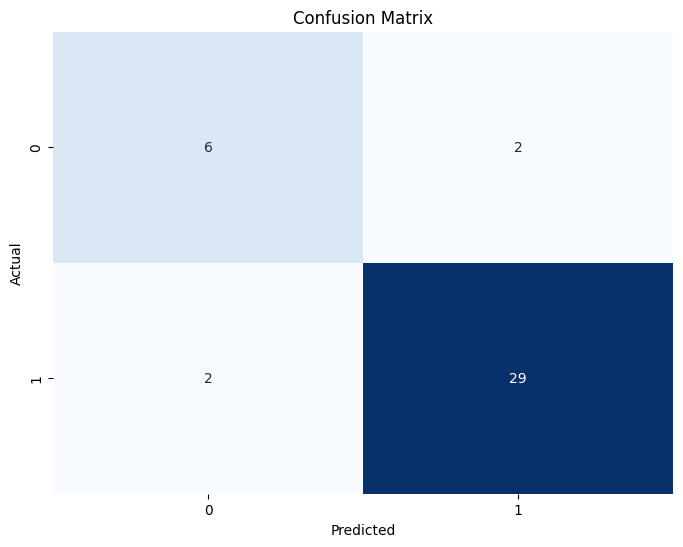

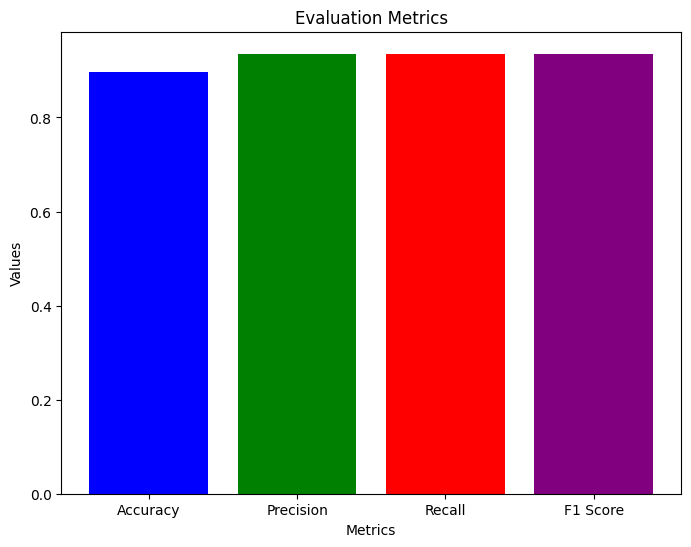

Classification Report:
              precision    recall  f1-score    support
0              0.750000  0.750000  0.750000   8.000000
1              0.935484  0.935484  0.935484  31.000000
accuracy       0.897436  0.897436  0.897436   0.897436
macro avg      0.842742  0.842742  0.842742  39.000000
weighted avg   0.897436  0.897436  0.897436  39.000000
AdaBoost with SVM Prediction: [0]
The person is healthy according to AdaBoost with SVM


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Data collection and Analysis
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

# Data Pre-Processing
# Exclude 'name' feature
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

# Split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Data Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: SelectKBest with f_classif (ANOVA F-value)
# Choose the top k features based on their F-values
k_best_selector = SelectKBest(f_classif, k='all')
X_train_selected = k_best_selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = k_best_selector.transform(X_test_scaled)

# Hyperparameter tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}
svm_model = SVC(probability=True, random_state=2)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_selected, Y_train)


best_svm_model = grid_search_svm.best_estimator_


svm_train_predictions = best_svm_model.predict(X_train_selected)
svm_test_predictions = best_svm_model.predict(X_test_selected)

svm_train_accuracy = accuracy_score(Y_train, svm_train_predictions)
svm_test_accuracy = accuracy_score(Y_test, svm_test_predictions)

print('SVM - Accuracy score on training data: ', svm_train_accuracy)
print('SVM - Accuracy score on test data: ', svm_test_accuracy)


adaboost_model = AdaBoostClassifier(base_estimator=best_svm_model, n_estimators=100, random_state=2)
adaboost_model.fit(X_train_selected, Y_train)


adaboost_train_predictions = adaboost_model.predict(X_train_selected)
adaboost_test_predictions = adaboost_model.predict(X_test_selected)

adaboost_train_accuracy = accuracy_score(Y_train, adaboost_train_predictions)
adaboost_test_accuracy = accuracy_score(Y_test, adaboost_test_predictions)

print('AdaBoost with SVM - Accuracy score on training data: ', adaboost_train_accuracy)
print('AdaBoost with SVM - Accuracy score on test data: ', adaboost_test_accuracy)


adaboost_test_precision = precision_score(Y_test, adaboost_test_predictions)
adaboost_test_recall = recall_score(Y_test, adaboost_test_predictions)
adaboost_test_f1 = f1_score(Y_test, adaboost_test_predictions)

print('AdaBoost with SVM - Precision: ', adaboost_test_precision)
print('AdaBoost with SVM - Recall: ', adaboost_test_recall)
print('AdaBoost with SVM - F1 Score: ', adaboost_test_f1)


confusion_mat = confusion_matrix(Y_test, adaboost_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()


metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [adaboost_test_accuracy, adaboost_test_precision, adaboost_test_recall, adaboost_test_f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.savefig('evaluation_metrics.png')
plt.show()


print("Classification Report:")
classification_rep = classification_report(Y_test, adaboost_test_predictions, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()
classification_df.to_csv('classification_report.csv', index=False)
print(classification_df)

# Parkinson's Predictive system using AdaBoost with SVM
input_data = np.array([236.20000, 244.66300, 102.13700, 0.00277, 0.00001, 0.00154, 0.00153, 0.00462, 0.02448, 0.21700, 0.01410, 0.01426, 0.01621, 0.04231, 0.00620, 24.07800, 0.469928, 0.628232, -6.816086, 0.172270, 2.235197, 0.119652])
input_data = input_data.reshape(1, -1)
standard_data = scaler.transform(input_data)
selected_input_data = k_best_selector.transform(standard_data)

adaboost_prediction = adaboost_model.predict(selected_input_data)

print("AdaBoost with SVM Prediction:", adaboost_prediction)

if adaboost_prediction[0] == 0:
    print('The person is healthy according to AdaBoost with SVM')
else:
    print("The person has Parkinson's disease according to AdaBoost with SVM")

